In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [2]:
with open("../data/processed/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

with open("../data/processed/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

with open("../data/processed/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

with open("../data/processed/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("Data loaded successfully.")

Data loaded successfully.


In [4]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight="balanced", max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [5]:
y_pred = log_model.predict(X_test)
y_probs = log_model.predict_proba(X_test)[:, 1]


In [7]:
confusion_matrix(y_test, y_pred)


array([[724, 309],
       [ 77, 297]])

In [8]:
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.8354579621164667


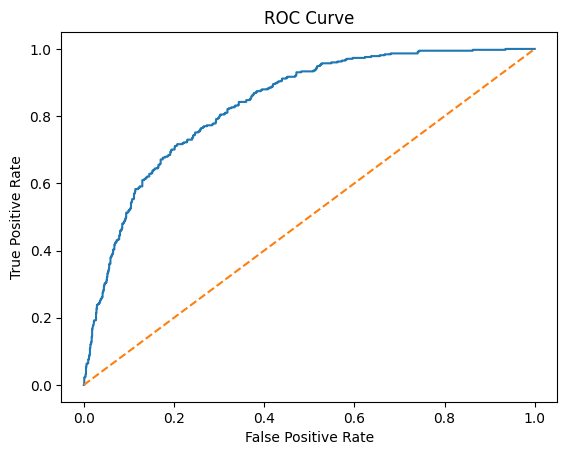

In [ ]:


fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


The Logistic Regression model achieved:

- ROC-AUC: 0.835
- Recall (Churn): ~79%
- Precision (Churn): ~49%

The model successfully identifies approximately 79% of churners while maintaining moderate precision.

Given that the cost of missing a churner is higher than contacting a loyal customer, recall is prioritized.


In [10]:
import numpy as np
from sklearn.metrics import recall_score, precision_score

thresholds = np.arange(0.1, 0.9, 0.05)

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    print(f"Threshold: {t:.2f} | Recall: {recall:.3f} | Precision: {precision:.3f}")


Threshold: 0.10 | Recall: 0.984 | Precision: 0.345
Threshold: 0.15 | Recall: 0.973 | Precision: 0.368
Threshold: 0.20 | Recall: 0.960 | Precision: 0.386
Threshold: 0.25 | Recall: 0.936 | Precision: 0.398
Threshold: 0.30 | Recall: 0.930 | Precision: 0.414
Threshold: 0.35 | Recall: 0.904 | Precision: 0.429
Threshold: 0.40 | Recall: 0.872 | Precision: 0.452
Threshold: 0.45 | Recall: 0.832 | Precision: 0.470
Threshold: 0.50 | Recall: 0.794 | Precision: 0.490
Threshold: 0.55 | Recall: 0.762 | Precision: 0.515
Threshold: 0.60 | Recall: 0.719 | Precision: 0.543
Threshold: 0.65 | Recall: 0.679 | Precision: 0.573
Threshold: 0.70 | Recall: 0.620 | Precision: 0.614
Threshold: 0.75 | Recall: 0.535 | Precision: 0.649
Threshold: 0.80 | Recall: 0.390 | Precision: 0.689
Threshold: 0.85 | Recall: 0.217 | Precision: 0.736


In [11]:

with open("../models/log_model.pkl", "wb") as f:
    pickle.dump(log_model, f)